In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os

In [166]:
class CFG:
    data_path = './../data/bank_statements'
    column_names = ['Date', 'Transaction Value', 'Narration', 'Account Balance']
    fig_size = (15, 9)
    n_rows = 20
    
# todo: table formatting, float formatting, date formatting

In [167]:
# categorize transactions into Income and Expenses
def categorize_transaction(narration):  # fix_me
    if 'credit' in narration.lower():
        return 'Income'
    else:
        return 'Expense'

# Brisbane

In [168]:
brisbane_df = pd.read_csv(
    os.path.join(CFG.data_path, 'Brisbane.csv'),
    names=CFG.column_names
)
brisbane_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,46.00,POS 26652200 30 JUN,28039.26
1,30/06/2023,903.29,Direct Credit 485450 SQUARE AU PTY LT,27993.26
2,29/06/2023,26.00,POS 26652200 29 JUN,27089.97
3,29/06/2023,948.77,Direct Credit 485450 SQUARE AU PTY LT,27063.97
4,28/06/2023,169.00,POS 26652200 28 JUN,26115.20
5,28/06/2023,575.85,Direct Credit 485450 SQUARE AU PTY LT,25946.20
6,28/06/2023,-200.00,Transfer to xx1247 CommBank app thiccmats,25370.35
7,27/06/2023,119.00,POS 26652200 27 JUN,25570.35
8,27/06/2023,-230.20,Direct Debit 481471 SuperChoice P/L PC270623-1...,25451.35
9,27/06/2023,1786.60,Direct Credit 485450 SQUARE AU PTY LT,25681.55


In [169]:
brisbane_df['Date'] = pd.to_datetime(brisbane_df['Date'], dayfirst=True, errors='coerce')
brisbane_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [170]:
# display basic information about the dataset
brisbane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [171]:
# summary statistics
brisbane_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-03-26 06:48:00,25.976183,20181.530483
min,2022-12-18 00:00:00,-10200.000000,1755.930000
25%,2023-02-06 00:00:00,-58.440000,14267.565000
50%,2023-03-27 00:00:00,93.000000,19151.435000
75%,2023-05-13 06:00:00,509.870000,23569.042500
max,2023-06-30 00:00:00,7000.000000,44448.620000
std,NaN,1463.827134,9457.760861


In [172]:
# check for missing values
brisbane_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

In [173]:
brisbane_df['Category'] = brisbane_df['Narration'].apply(categorize_transaction)  # fix_me
brisbane_df.head(CFG.n_rows)  # fix_me 

,Date,Transaction Value,Narration,Account Balance,Category
0,2023-06-30,46.00,POS 26652200 30 JUN,28039.26,Expense
1,2023-06-30,903.29,Direct Credit 485450 SQUARE AU PTY LT,27993.26,Income
2,2023-06-29,26.00,POS 26652200 29 JUN,27089.97,Expense
3,2023-06-29,948.77,Direct Credit 485450 SQUARE AU PTY LT,27063.97,Income
4,2023-06-28,169.00,POS 26652200 28 JUN,26115.20,Expense
5,2023-06-28,575.85,Direct Credit 485450 SQUARE AU PTY LT,25946.20,Income
6,2023-06-28,-200.00,Transfer to xx1247 CommBank app thiccmats,25370.35,Expense
7,2023-06-27,119.00,POS 26652200 27 JUN,25570.35,Expense
8,2023-06-27,-230.20,Direct Debit 481471 SuperChoice P/L PC270623-1...,25451.35,Expense
9,2023-06-27,1786.60,Direct Credit 485450 SQUARE AU PTY LT,25681.55,Income


In [174]:
# sort by date to ensure correct sequential processing
brisbane_df = brisbane_df.sort_values(by='Date').reset_index(drop=True)

In [175]:
# calculate the change in account balance for each transaction
brisbane_df['Balance Change'] = brisbane_df['Account Balance'].diff()

In [176]:
# classify transactions based on the change in account balance
brisbane_df['Accounting Category'] = brisbane_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')
brisbane_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change,Accounting Category
0,2022-12-18,-33.10,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12420.45,Expense,NaN,Debit
1,2022-12-18,-16.47,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12403.98,Expense,-16.47,Debit
2,2022-12-18,22.00,POS 26652200 18 DEC,12425.98,Expense,22.00,Credit
3,2022-12-19,69.98,Direct Credit 485450 SQUARE AU PTY LT,12495.96,Income,69.98,Credit
4,2022-12-19,98.00,POS 26652200 19 DEC,12593.96,Expense,98.00,Credit
5,2022-12-20,-8433.34,Transfer To Gimanana Pty Ltd CommBank App 2223...,3760.00,Expense,-8833.96,Debit
6,2022-12-20,-901.15,Transfer To Leisa Ohl CommBank App wages,12193.34,Expense,8433.34,Credit
7,2022-12-20,-901.15,Transfer To Jamie Timms CommBank App wages,13094.49,Expense,901.15,Credit
8,2022-12-20,156.00,POS 26652200 20 DEC,13995.64,Expense,901.15,Credit
9,2022-12-20,-58.00,WOOLWORTHS/MT GRAVATT PLZ MT GRAVATT AU Card x...,12535.96,Expense,-1459.68,Debit


In [177]:
# monthly summary of transactions
brisbane_monthly_summary = brisbane_df.groupby([brisbane_df['Date'].dt.to_period('M'), 'Accounting Category'])['Transaction Value'].sum().unstack().fillna(0)

In [178]:
# calculate net balance for each month
brisbane_monthly_summary['Net Cash'] = brisbane_monthly_summary['Credit'] + brisbane_monthly_summary['Debit']

In [179]:
# calculate total income, total expenses, and net balance
total_income = brisbane_df[brisbane_df['Accounting Category'] == 'Credit']['Transaction Value'].sum()
total_expenses = brisbane_df[brisbane_df['Accounting Category'] == 'Debit']['Transaction Value'].sum()
net_balance = total_income + total_expenses

In [180]:
# display monthly summary
brisbane_monthly_summary
# todo: add trend line

Accounting Category,Credit,Debit,Net Cash
Date,,,
2022-12,7518.97,-9242.65,-1723.68
2023-01,27558.03,-23332.82,4225.21
2023-02,23328.31,-25572.61,-2244.30
2023-03,19567.91,-12279.34,7288.57
2023-04,24688.94,-19599.13,5089.81
2023-05,32476.78,-40253.49,-7776.71
2023-06,27736.34,-17009.53,10726.81


In [181]:
# Print key metrics
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expenses}")
print(f"Net Balance: {round(net_balance, 2)}")

Total Income: 162875.28
Total Expenses: -147289.57
Net Balance: 15585.71


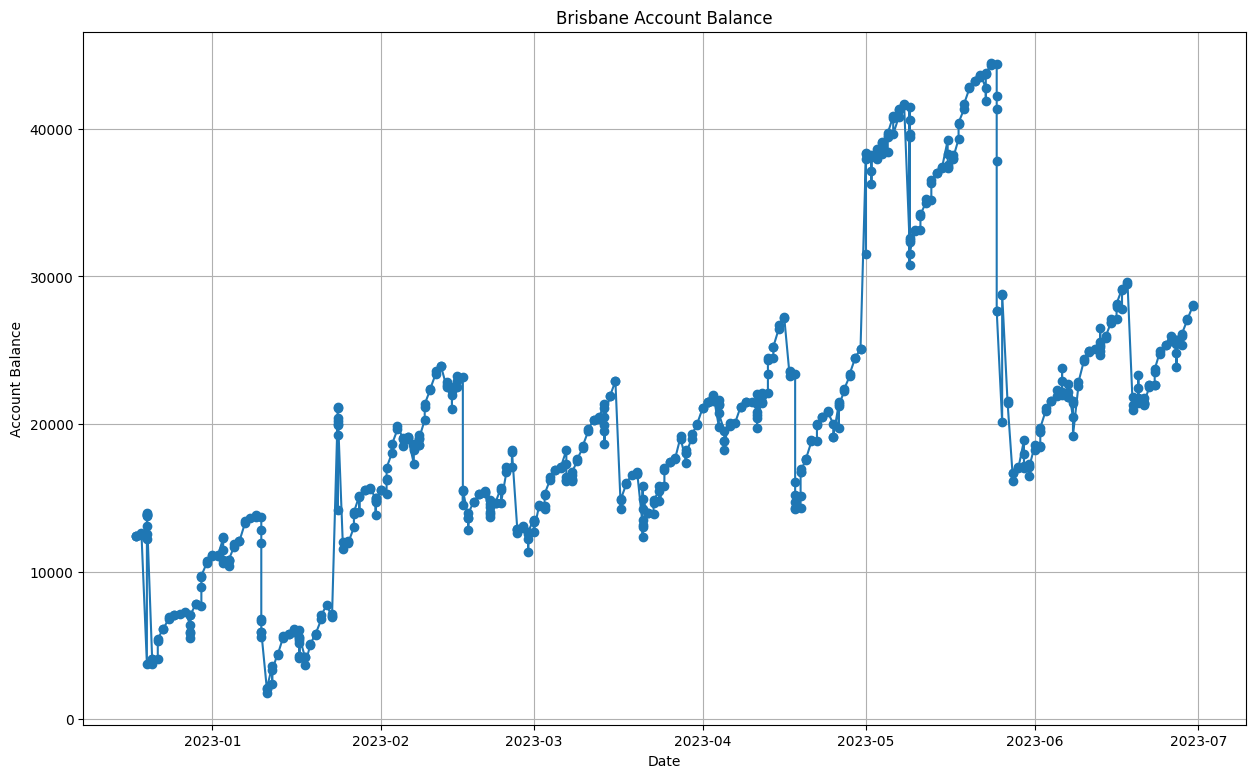

In [182]:
plt.figure(figsize=CFG.fig_size)
plt.plot(brisbane_df['Date'], brisbane_df['Account Balance'], marker='o', linestyle='-')
plt.title('Brisbane Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

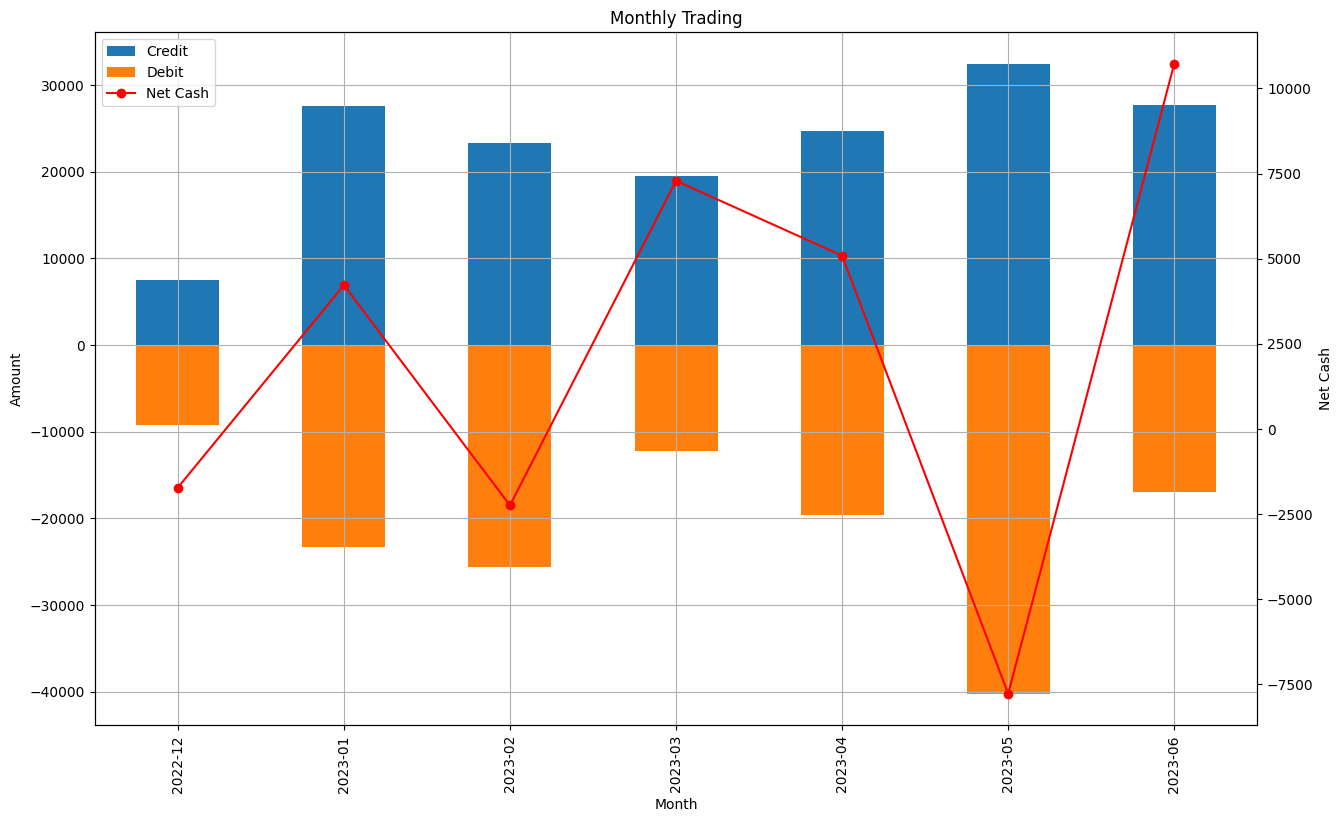

In [183]:
# plotting monthly income and expenses with net cash line
fig, ax1 = plt.subplots(figsize=CFG.fig_size)

brisbane_monthly_summary[['Credit', 'Debit']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Monthly Trading')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount')
ax1.grid(True)

# plot net cash line
ax2 = ax1.twinx()
ax2.plot(brisbane_monthly_summary.index.astype(str), brisbane_monthly_summary['Net Cash'], color='red', marker='o', linestyle='-', label='Net Cash')
ax2.set_ylabel('Net Cash')

# combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

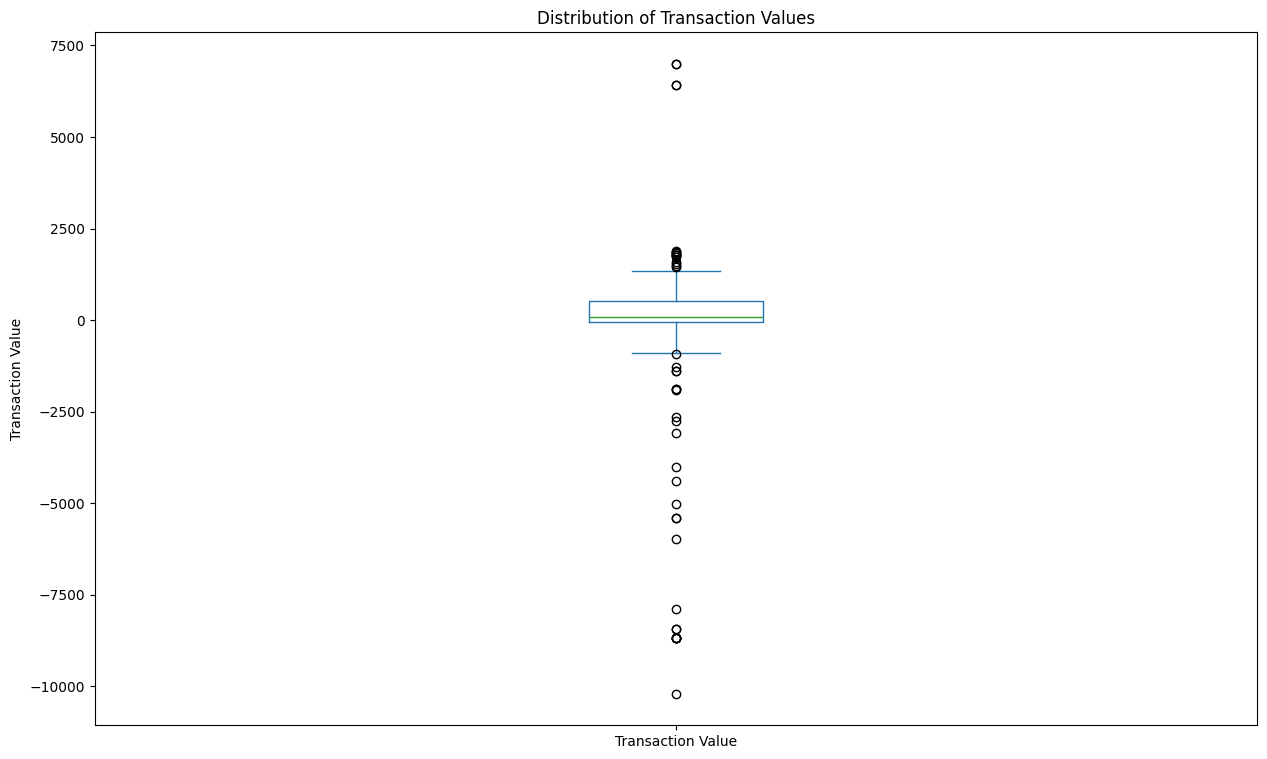

In [184]:
# detect anomalies in transaction values
brisbane_df['Transaction Value'].plot(kind='box', figsize=CFG.fig_size)
plt.title('Distribution of Transaction Values')
plt.ylabel('Transaction Value')
plt.show()
# todo: boxplots for each month

In [185]:
# interactive box plot using plotly
fig = px.box(brisbane_df, y='Transaction Value', points="all", hover_data=['Date', 'Narration', 'Transaction Value'])
fig.update_layout(
    title='Distribution of Transaction Values',
    yaxis_title='Transaction Value'
)
fig.show()

In [186]:
# Identify "Square" transactions and create a new column
brisbane_df['Narration Group'] = brisbane_df['Narration'].apply(lambda x: 'Square' if 'square' in x.lower() else x)
# brisbane_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change,Accounting Category,Narration Group
0,2022-12-18,-33.10,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12420.45,Expense,NaN,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
1,2022-12-18,-16.47,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12403.98,Expense,-16.47,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
2,2022-12-18,22.00,POS 26652200 18 DEC,12425.98,Expense,22.00,Credit,POS 26652200 18 DEC
3,2022-12-19,69.98,Direct Credit 485450 SQUARE AU PTY LT,12495.96,Income,69.98,Credit,Square
4,2022-12-19,98.00,POS 26652200 19 DEC,12593.96,Expense,98.00,Credit,POS 26652200 19 DEC
5,2022-12-20,-8433.34,Transfer To Gimanana Pty Ltd CommBank App 2223...,3760.00,Expense,-8833.96,Debit,Transfer To Gimanana Pty Ltd CommBank App 2223...
6,2022-12-20,-901.15,Transfer To Leisa Ohl CommBank App wages,12193.34,Expense,8433.34,Credit,Transfer To Leisa Ohl CommBank App wages
7,2022-12-20,-901.15,Transfer To Jamie Timms CommBank App wages,13094.49,Expense,901.15,Credit,Transfer To Jamie Timms CommBank App wages
8,2022-12-20,156.00,POS 26652200 20 DEC,13995.64,Expense,901.15,Credit,POS 26652200 20 DEC
9,2022-12-20,-58.00,WOOLWORTHS/MT GRAVATT PLZ MT GRAVATT AU Card x...,12535.96,Expense,-1459.68,Debit,WOOLWORTHS/MT GRAVATT PLZ MT GRAVATT AU Card x...


In [187]:
# categorize transactions into Credit and Debit based on account balance changes
brisbane_df = brisbane_df.sort_values(by='Date').reset_index(drop=True)
brisbane_df['Balance Change'] = brisbane_df['Account Balance'].diff()
brisbane_df['Category'] = brisbane_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')
# brisbane_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change,Accounting Category,Narration Group
0,2022-12-18,-33.10,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12420.45,Debit,NaN,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
1,2022-12-18,-16.47,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12403.98,Debit,-16.47,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
2,2022-12-18,22.00,POS 26652200 18 DEC,12425.98,Credit,22.00,Credit,POS 26652200 18 DEC
3,2022-12-19,69.98,Direct Credit 485450 SQUARE AU PTY LT,12495.96,Credit,69.98,Credit,Square
4,2022-12-19,98.00,POS 26652200 19 DEC,12593.96,Credit,98.00,Credit,POS 26652200 19 DEC
5,2022-12-20,120.00,Fast Transfer From BENJAMEN MAYFIELD-SMI rent ...,13855.69,Credit,1261.73,Credit,Fast Transfer From BENJAMEN MAYFIELD-SMI rent ...
6,2022-12-20,-56.05,Direct Debit 507156 XEROAUSTRALIAPTY XeroAUINV...,13839.64,Debit,-16.05,Credit,Direct Debit 507156 XEROAUSTRALIAPTY XeroAUINV...
7,2022-12-20,1199.73,Direct Credit 485450 SQUARE AU PTY LT,13735.69,Debit,-103.95,Debit,Square
8,2022-12-20,40.00,Fast Transfer From BENJAMEN MAYFIELD-SMI rent ...,13895.69,Credit,160.00,Credit,Fast Transfer From BENJAMEN MAYFIELD-SMI rent ...
9,2022-12-20,156.00,POS 26652200 20 DEC,13995.64,Credit,99.95,Credit,POS 26652200 20 DEC


In [188]:
# filter out negative values and select only expenses
expense_df = brisbane_df[brisbane_df['Category'] == 'Debit']
# expense_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change,Accounting Category,Narration Group
0,2022-12-18,-33.10,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12420.45,Debit,NaN,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
1,2022-12-18,-16.47,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12403.98,Debit,-16.47,Debit,BUNNINGS 556000 NEWSTEAD AU Card xx8568
6,2022-12-20,-56.05,Direct Debit 507156 XEROAUSTRALIAPTY XeroAUINV...,13839.64,Debit,-16.05,Credit,Direct Debit 507156 XEROAUSTRALIAPTY XeroAUINV...
7,2022-12-20,1199.73,Direct Credit 485450 SQUARE AU PTY LT,13735.69,Debit,-103.95,Debit,Square
10,2022-12-20,-901.15,Transfer To Jamie Timms CommBank App wages,13094.49,Debit,-901.15,Credit,Transfer To Jamie Timms CommBank App wages
11,2022-12-20,-901.15,Transfer To Leisa Ohl CommBank App wages,12193.34,Debit,-901.15,Credit,Transfer To Leisa Ohl CommBank App wages
12,2022-12-20,-8433.34,Transfer To Gimanana Pty Ltd CommBank App 2223...,3760.00,Debit,-8433.34,Debit,Transfer To Gimanana Pty Ltd CommBank App 2223...
14,2022-12-21,46.00,POS 26652200 21 DEC,4093.09,Debit,-8442.87,Credit,POS 26652200 21 DEC
15,2022-12-21,-37.83,AMAZON AU SYDNEY SOUTH AU Card xx8568 Value Da...,3722.17,Debit,-370.92,Debit,AMAZON AU SYDNEY SOUTH AU Card xx8568 Value Da...
18,2022-12-22,1252.72,Direct Credit 485450 SQUARE AU PTY LT,5301.20,Debit,-152.00,Credit,Square


In [189]:
income_df = expense_df[expense_df['Transaction Value'] > 0]
# income_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change,Accounting Category,Narration Group
7,2022-12-20,1199.73,Direct Credit 485450 SQUARE AU PTY LT,13735.69,Debit,-103.95,Debit,Square
14,2022-12-21,46.00,POS 26652200 21 DEC,4093.09,Debit,-8442.87,Credit,POS 26652200 21 DEC
18,2022-12-22,1252.72,Direct Credit 485450 SQUARE AU PTY LT,5301.20,Debit,-152.00,Credit,Square
25,2022-12-25,178.96,Fast Transfer From Square Australia Pty CREDIT...,7073.80,Debit,-4.00,Debit,Square
28,2022-12-28,14.00,POS 26652200 28 DEC,7071.13,Debit,-203.67,Credit,POS 26652200 28 DEC
29,2022-12-28,1129.75,Direct Credit 485450 SQUARE AU PTY LT,7057.13,Debit,-14.00,Credit,Square
30,2022-12-28,69.98,Direct Credit 485450 SQUARE AU PTY LT,5927.38,Debit,-1129.75,Credit,Square
37,2022-12-30,730.81,Direct Credit 485450 SQUARE AU PTY LT,9664.09,Debit,-60.00,Credit,Square
46,2023-01-03,256.00,POS 26652200 03 JAN,10809.32,Debit,-239.58,Credit,POS 26652200 03 JAN
49,2023-01-03,1129.75,Direct Credit 485450 SQUARE AU PTY LT,12250.65,Debit,-104.97,Credit,Square


In [190]:
# group by 'Narration Group' and sum the 'Transaction Value'
income_breakdown = income_df.groupby('Narration Group')['Transaction Value'].sum()
# income_breakdown.head(CFG.n_rows)

Narration Group
Direct Credit 452940 EDUCATION DETRCWSLOHL                           6428.31
Fast Transfer From BENJAMEN MAYFIELD-SMI Matter Athletica             140.00
Fast Transfer From BENJAMEN MAYFIELD-SMI coaching zerow inv ma009      68.00
Fast Transfer From BENJAMEN MAYFIELD-SMI matter athletica clients     112.00
POS 26652200 03 JAN                                                   256.00
POS 26652200 04 JAN                                                    89.00
POS 26652200 06 JUN                                                   207.00
POS 26652200 07 MAR                                                    68.00
POS 26652200 08 MAR                                                   294.00
POS 26652200 09 MAY                                                   132.00
POS 26652200 10 JAN                                                   108.00
POS 26652200 18 JAN                                                    43.00
POS 26652200 19 APR                                         

In [191]:
# get the top 10 expense categories and group the rest into 'Other'
top_income_breakdown = income_breakdown.nlargest(10)
other_expenses = income_breakdown.sum() - top_income_breakdown.sum()
top_income_breakdown['Other'] = other_expenses

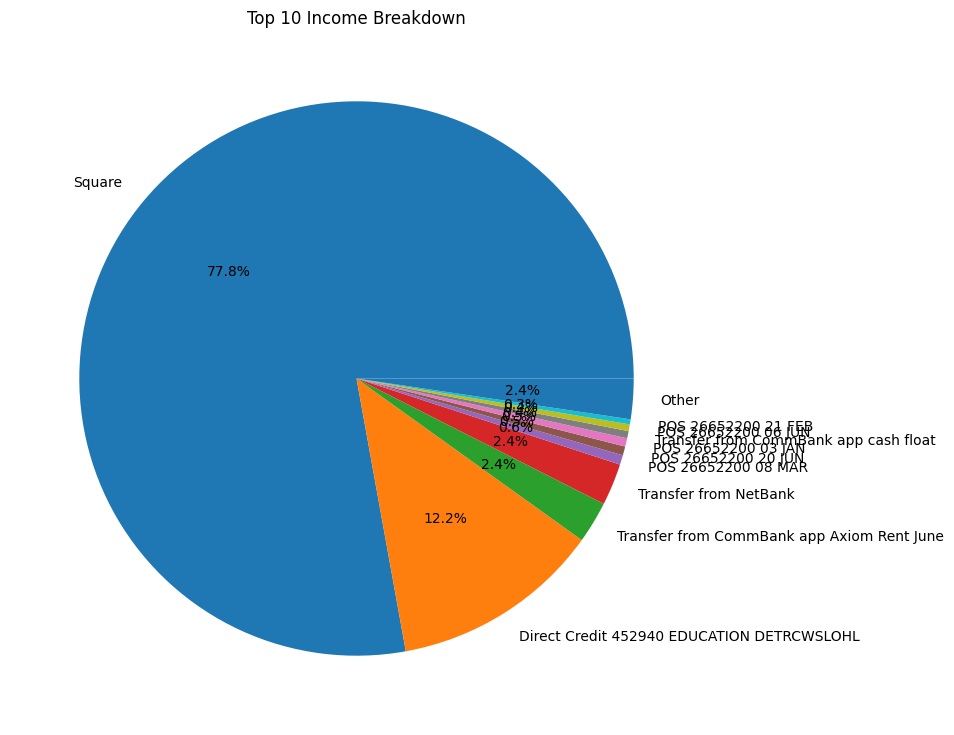

In [192]:
# plot expense breakdown
top_income_breakdown.plot(kind='pie', autopct='%1.1f%%', figsize=CFG.fig_size)
plt.title('Top 10 Income Breakdown')
plt.ylabel('')
plt.show()

# Southside

In [193]:
southside_df = pd.read_csv(
    os.path.join(CFG.data_path, 'Southside.csv'),
    names=CFG.column_names
)
southside_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,12.00,POS 36925500 30 JUN,17412.96
1,30/06/2023,80.00,Fast Transfer From Mr Jianxuan Dong Raymond,17400.96
2,30/06/2023,1187.95,Direct Credit 485450 SQUARE AU PTY LT,17320.96
3,30/06/2023,121.81,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,16133.01
4,29/06/2023,154.00,POS 36925500 29 JUN,16011.20
5,29/06/2023,1045.63,Direct Credit 485450 SQUARE AU PTY LT,15857.20
6,28/06/2023,268.00,POS 36925500 28 JUN,14811.57
7,28/06/2023,495.91,Direct Credit 485450 SQUARE AU PTY LT,14543.57
8,28/06/2023,-5010.00,Transfer To Sukic Family CommBank App inv0792,14047.66
9,28/06/2023,96.44,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,19057.66


In [194]:
southside_df['Date'] = pd.to_datetime(
    southside_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
southside_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [195]:
southside_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-22 06:00:00,-46.835550,32184.871150
min,2023-02-13 00:00:00,-14000.000000,14047.660000
25%,2023-03-20 00:00:00,8.750000,26450.277500
50%,2023-04-23 12:00:00,83.500000,32447.580000
75%,2023-05-26 00:00:00,237.690000,37044.662500
max,2023-06-30 00:00:00,12800.000000,46927.410000
std,NaN,1580.204383,6821.487353


In [196]:
southside_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [197]:
southside_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

In [198]:
southside_df['Category'] = southside_df['Narration'].apply(categorize_transaction)
southside_df.head(CFG.n_rows)  # fix_me

,Date,Transaction Value,Narration,Account Balance,Category
0,2023-06-30,12.00,POS 36925500 30 JUN,17412.96,Expense
1,2023-06-30,80.00,Fast Transfer From Mr Jianxuan Dong Raymond,17400.96,Expense
2,2023-06-30,1187.95,Direct Credit 485450 SQUARE AU PTY LT,17320.96,Income
3,2023-06-30,121.81,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,16133.01,Income
4,2023-06-29,154.00,POS 36925500 29 JUN,16011.20,Expense
5,2023-06-29,1045.63,Direct Credit 485450 SQUARE AU PTY LT,15857.20,Income
6,2023-06-28,268.00,POS 36925500 28 JUN,14811.57,Expense
7,2023-06-28,495.91,Direct Credit 485450 SQUARE AU PTY LT,14543.57,Income
8,2023-06-28,-5010.00,Transfer To Sukic Family CommBank App inv0792,14047.66,Expense
9,2023-06-28,96.44,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,19057.66,Income


In [199]:
# sort by date to ensure correct sequential processing
southside_df = southside_df.sort_values(by='Date').reset_index(drop=True)

In [200]:
# calculate the change in account balance for each transaction
southside_df['Balance Change'] = southside_df['Account Balance'].diff()

In [201]:
# classify transactions based on the change in account balance
southside_df['Category'] = southside_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')
southside_df.head(CFG.n_rows)  # fix_me

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change
0,2023-02-13,303.00,POS 36925500 13 FEB,45817.29,Debit,NaN
1,2023-02-14,100.00,POS 36925500 14 FEB,45802.46,Debit,-14.83
2,2023-02-14,-139.33,Direct Debit 481471 SuperChoice P/L PC140223-1...,45702.46,Debit,-100.00
3,2023-02-14,237.69,Direct Credit 485450 SQUARE AU PTY LT,45841.79,Credit,139.33
4,2023-02-14,40.00,Fast Transfer From Mr Jianxuan Dong Raymond,45857.29,Credit,15.50
5,2023-02-14,-1051.92,Transfer To Rachelle Howe CommBank App wages,44880.37,Debit,-976.92
6,2023-02-14,55.00,Fast Transfer From DANITA KEAST Danita Keast Z...,45912.29,Credit,1031.92
7,2023-02-14,723.73,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,45604.10,Debit,-308.19
8,2023-02-14,20.00,Fast Transfer From Mr Jianxuan Dong Raymond,45932.29,Credit,328.19
9,2023-02-15,-1566.25,Transfer to CBA A/c NetBank ZeroWSBWeb,44236.21,Debit,-1696.08


In [202]:
# monthly summary of transactions
monthly_summary = southside_df.groupby([southside_df['Date'].dt.to_period('M'), 'Category'])['Transaction Value'].sum().unstack().fillna(0)

In [203]:
# calculate net balance for each month
monthly_summary['Net Cash'] = monthly_summary['Credit'] + monthly_summary['Debit']

In [204]:
# Calculate total income, total expenses, and net balance
total_income = southside_df[southside_df['Category'] == 'Credit']['Transaction Value'].sum()
total_expenses = southside_df[southside_df['Category'] == 'Debit']['Transaction Value'].sum()
net_cash = total_income + total_expenses

In [205]:
# Print key metrics
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expenses}")
print(f"Net Cash: {round(net_cash, 2)}")

Total Income: 85179.73
Total Expenses: -113281.06
Net Cash: -28101.33


In [206]:
monthly_summary

Category,Credit,Debit,Net Cash
Date,,,
2023-02,10311.96,-30189.11,-19877.15
2023-03,17430.87,-15910.87,1520.00
2023-04,26363.97,-16061.51,10302.46
2023-05,26749.95,-28762.06,-2012.11
2023-06,4322.98,-22357.51,-18034.53


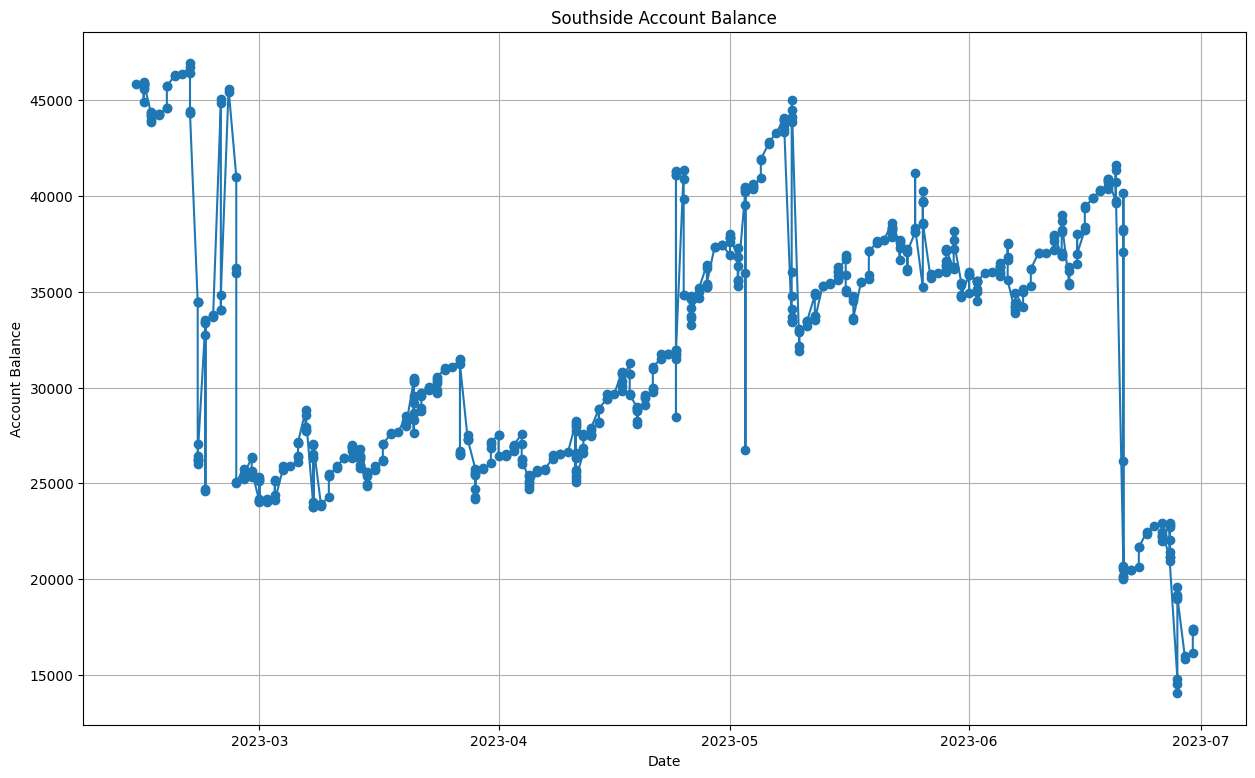

In [207]:
plt.figure(figsize=CFG.fig_size)
plt.plot(southside_df['Date'], southside_df['Account Balance'], marker='o', linestyle='-')
plt.title('Southside Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()
# todo: add trend line

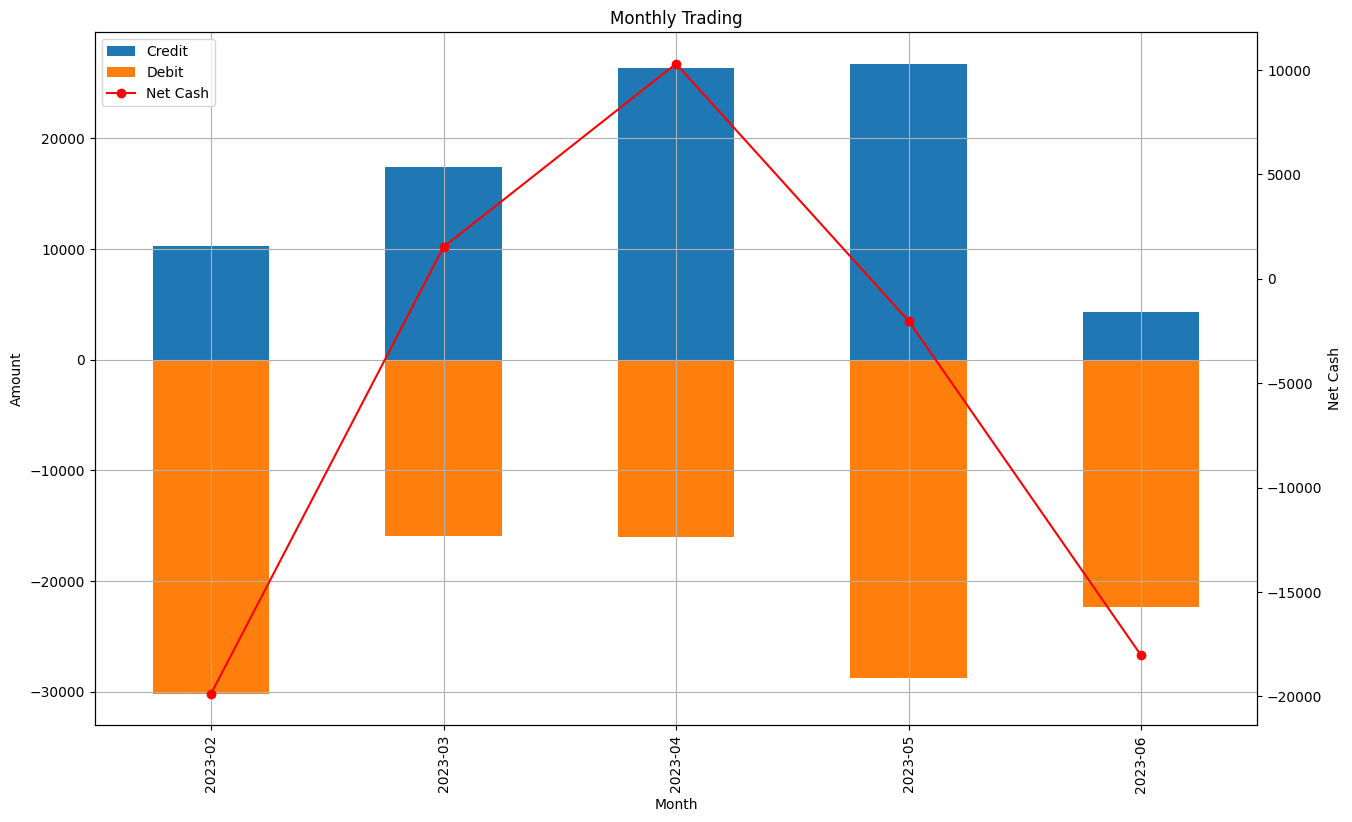

In [208]:
# plotting monthly income and expenses with net cash line
fig, ax1 = plt.subplots(figsize=CFG.fig_size)

monthly_summary[['Credit', 'Debit']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Monthly Trading')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount')
ax1.grid(True)

# Plot net cash line
ax2 = ax1.twinx()
ax2.plot(monthly_summary.index.astype(str), monthly_summary['Net Cash'], color='red', marker='o', linestyle='-', label='Net Cash')
ax2.set_ylabel('Net Cash')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

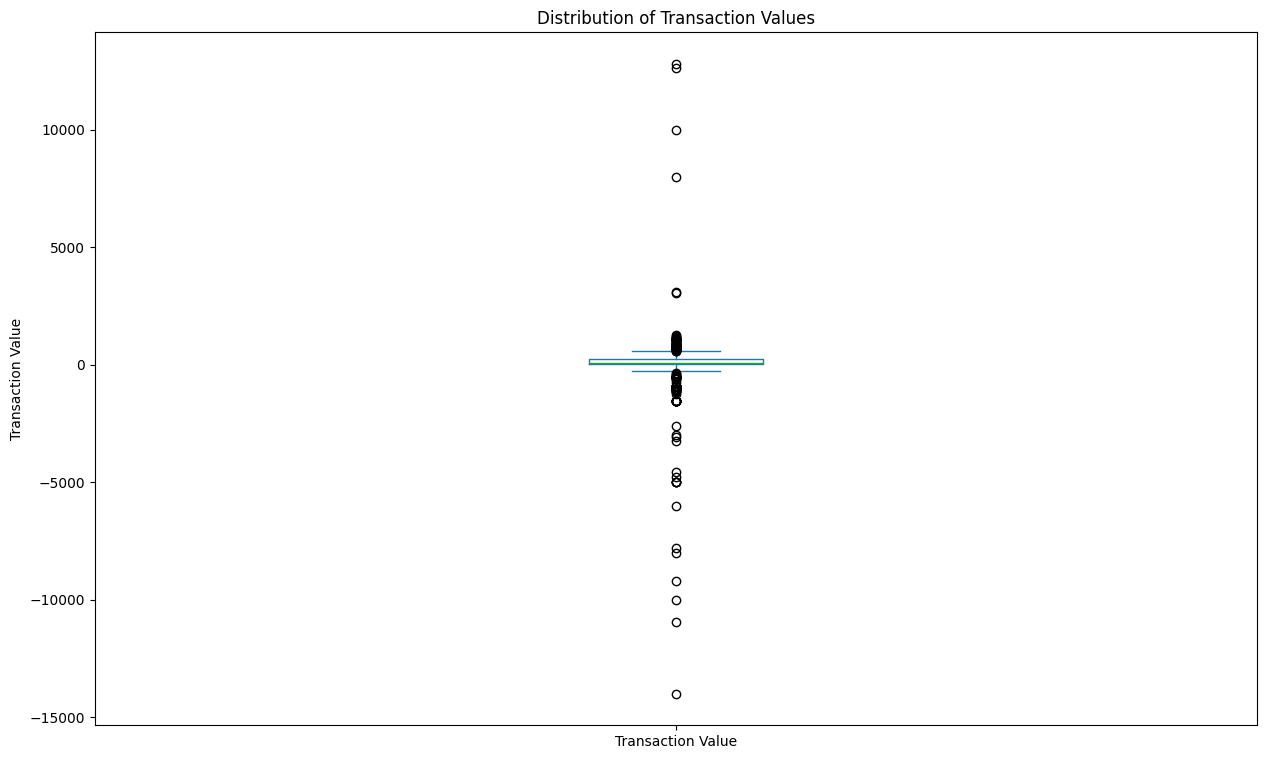

In [209]:
# Detect anomalies in transaction values MPL
southside_df['Transaction Value'].plot(kind='box', figsize=CFG.fig_size)
plt.title('Distribution of Transaction Values')
plt.ylabel('Transaction Value')
plt.show()

In [210]:
fig = px.box(southside_df, y='Transaction Value', points="all", hover_data=['Date', 'Narration', 'Transaction Value'])
fig.update_layout(
    title='SB distn of Transaction Values',
    yaxis_title='Transaction Value'
)
fig.show()

In [211]:
# identify "Square" transactions and create a new column
southside_df['Narration Group'] = southside_df['Narration'].apply(lambda x: 'Square' if 'square' in x.lower() else x)

In [212]:
# categorize transactions into Credit and Debit based on account balance changes
southside_df = southside_df.sort_values(by='Date').reset_index(drop=True)
southside_df['Balance Change'] = brisbane_df['Account Balance'].diff()
southside_df['Category'] = southside_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')

In [213]:
# filter out negative values and select only expenses
expense_df = southside_df[southside_df['Category'] == 'Debit']
income_df = expense_df[expense_df['Transaction Value'] > 0]

In [214]:
# group by 'Narration Group' and sum the 'Transaction Value'
income_breakdown = income_df.groupby('Narration Group')['Transaction Value'].sum()

In [215]:
# get the top 10 expense categories and group the rest into 'Other'
top_expense_breakdown = income_breakdown.nlargest(10)
other_expenses = income_breakdown.sum() - top_expense_breakdown.sum()
top_expense_breakdown['Other'] = other_expenses

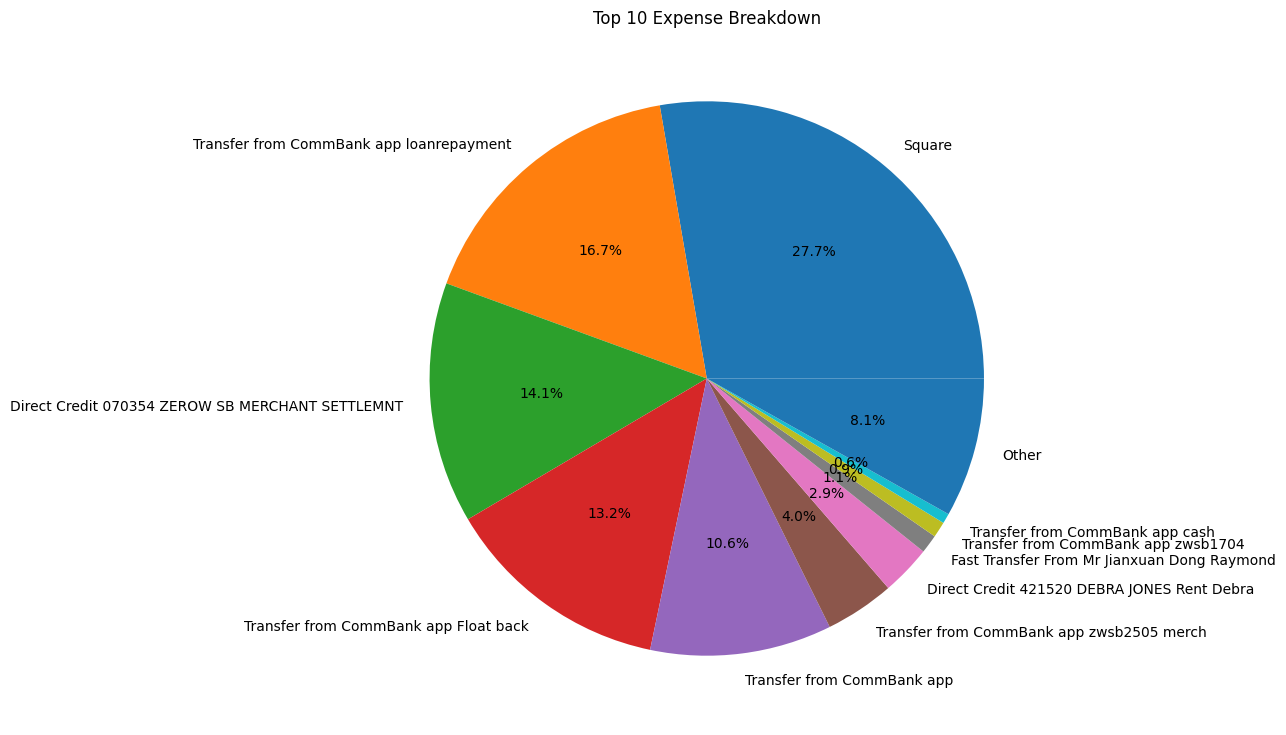

In [216]:
# plot expense breakdown
top_expense_breakdown.plot(kind='pie', autopct='%1.1f%%', figsize=CFG.fig_size)
plt.title('Top 10 Expense Breakdown')
plt.ylabel('')
plt.show()

# Cairns

In [217]:
cairns_df = pd.read_csv(
    os.path.join(CFG.data_path, 'Cairns.csv'),
    names=CFG.column_names
)
cairns_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,199.00,POS 35362000 30 JUN,28457.73
1,30/06/2023,-441.50,NU NU RESTAURANT PALM COVE AU Card xx3475,28258.73
2,30/06/2023,625.12,Direct Credit 485450 SQUARE AU PTY LT,28700.23
3,30/06/2023,250.00,Direct Credit 148013 W M JACOB Will Jacob rent,28075.11
4,30/06/2023,235.00,Fast Transfer From BCH Strength CREDIT TO ACCO...,27825.11
5,29/06/2023,160.00,POS 35362000 29 JUN,27590.11
6,29/06/2023,4458.63,Direct Credit 485450 SQUARE AU PTY LT,27430.11
7,29/06/2023,135.00,Direct Credit 128594 PROJECT LIFE PT rent,22971.48
8,29/06/2023,-90.40,COLES ONLINE HAWTHORN EAST AU Card xx3467 Valu...,22836.48
9,28/06/2023,41.00,POS 35362000 28 JUN,22926.88


In [218]:
cairns_df['Date'] = pd.to_datetime(
    cairns_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
cairns_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [219]:
cairns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [220]:
cairns_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-10 12:28:48,43.811083,9948.890167
min,2023-01-18 00:00:00,-5038.510000,315.940000
25%,2023-02-25 18:00:00,-108.917500,3752.185000
50%,2023-04-11 00:00:00,45.000000,7390.345000
75%,2023-05-25 00:00:00,201.250000,15511.540000
max,2023-06-30 00:00:00,5888.000000,28700.230000
std,NaN,1070.258521,7332.540564


In [221]:
cairns_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

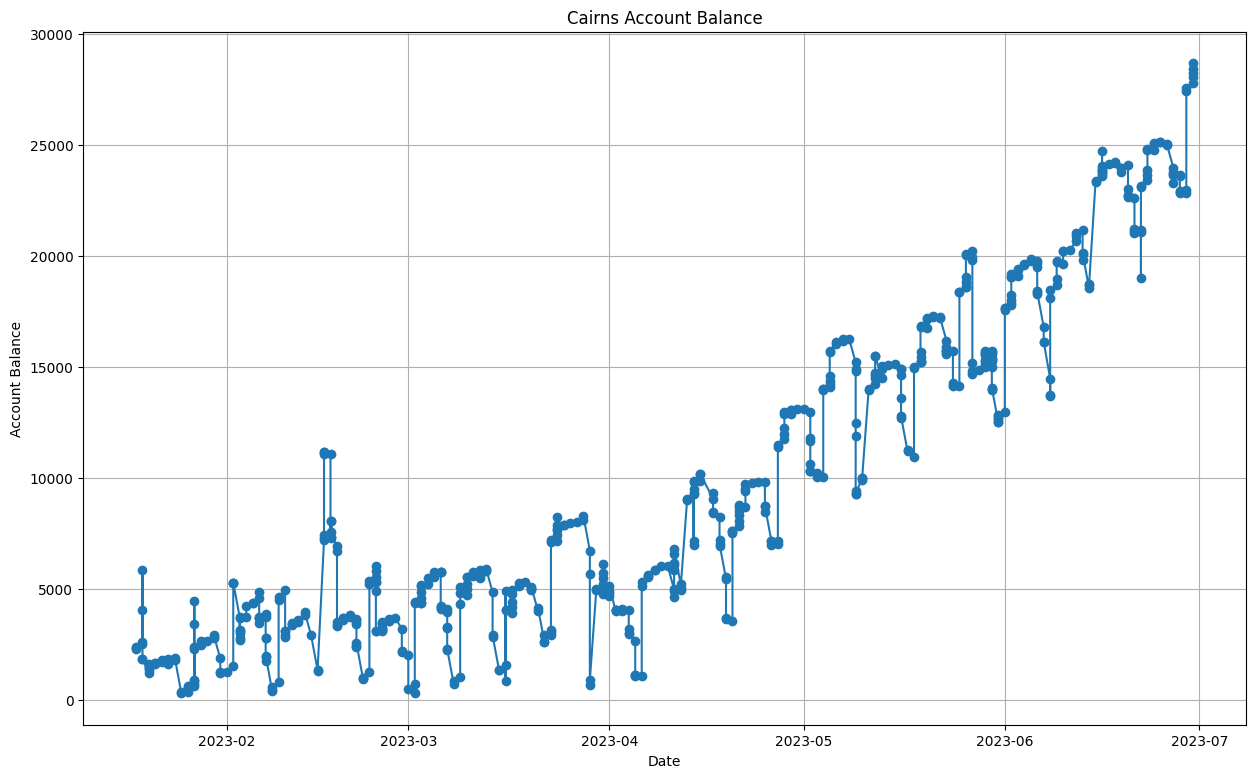

In [222]:
plt.figure(figsize=CFG.fig_size)
plt.plot(cairns_df['Date'], cairns_df['Account Balance'], marker='o', linestyle='-')
plt.title('Cairns Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()
# todo: add trend line

# Mackay

In [223]:
mackay_df = pd.read_csv(
    os.path.join(CFG.data_path, 'Mackay.csv'),
    names=CFG.column_names
)
mackay_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,195.00,POS 17509700 30 JUN,26936.25
1,30/06/2023,-488.00,Transfer To Wiktoria Alexandersson CommBank Ap...,26741.25
2,30/06/2023,-1113.46,Transfer To Rebecca Moore CommBank App ZeroW Pay,27229.25
3,30/06/2023,-620.40,Transfer To Illguth Family CommBank App ZeroW Pay,28342.71
4,30/06/2023,-135.53,Transfer To Crafty Properties NetBank ZeroW Ma...,28963.11
5,30/06/2023,-10431.27,Transfer To Crafty Properties NetBank ZeroW Ma...,29098.64
6,30/06/2023,-60.01,SPORTS NUTRITION AUST ALBION AU Card xx2355 Va...,39529.91
7,30/06/2023,-51.00,AP MACKAY CANELAND PS MACKAY AU Card xx2355 Va...,39589.92
8,29/06/2023,155.00,POS 17509700 29 JUN,39640.92
9,29/06/2023,-100.00,Transfer to CBA A/c NetBank ZeroW Marketing,39485.92


In [224]:
mackay_df['Date'] = pd.to_datetime(
    mackay_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
mackay_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [225]:
mackay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [226]:
mackay_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-19 08:55:12,-24.290850,35584.320050
min,2023-02-09 00:00:00,-15300.000000,8225.730000
25%,2023-03-14 00:00:00,-203.500000,24282.020000
50%,2023-04-18 00:00:00,-12.805000,34414.545000
75%,2023-05-29 06:00:00,120.000000,46282.795000
max,2023-06-30 00:00:00,11106.720000,62532.770000
std,NaN,2267.652377,12648.336441


In [227]:
mackay_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

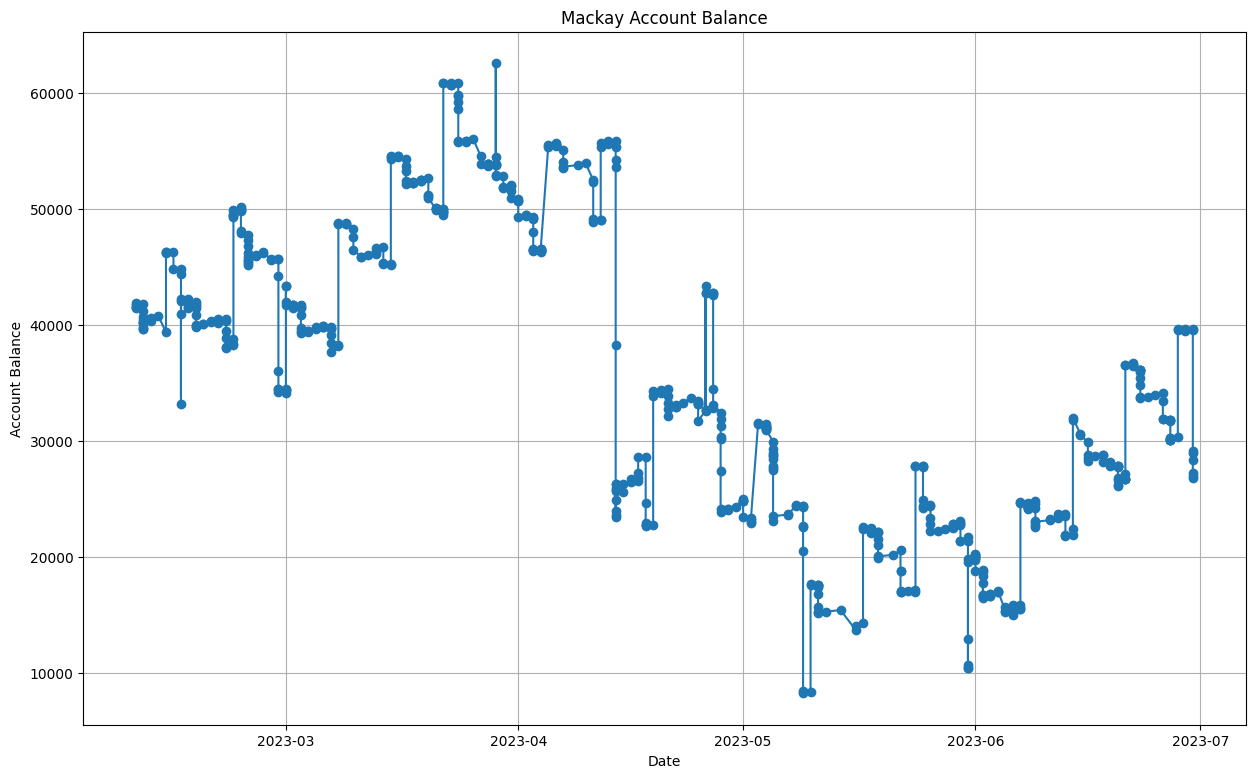

In [228]:
plt.figure(figsize=CFG.fig_size)
plt.plot(mackay_df['Date'], mackay_df['Account Balance'], marker='o', linestyle='-')
plt.title('Mackay Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()
# todo: add trend line

# Gold Coast

In [229]:
gc_df = pd.read_csv(
    os.path.join(CFG.data_path, 'LilleyBuddy.csv'),
    names=CFG.column_names
)
gc_df.head(CFG.n_rows)

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,25.00,POS 83081600 30 JUN,5696.73
1,30/06/2023,233.00,POS 83081300 30 JUN,5671.73
2,30/06/2023,1674.91,Direct Credit 485450 SQUARE AU PTY LT,5438.73
3,30/06/2023,-1005.05,Transfer To Frucor CommBank App 671450zerow,3763.82
4,30/06/2023,-500.00,DEFT RENT NetBank BPAY 4481 34268144,4768.87
5,29/06/2023,16.00,POS 83081300 29 JUN,5268.87
6,29/06/2023,65.00,POS 83081600 29 JUN,5252.87
7,29/06/2023,1313.14,Direct Credit 485450 SQUARE AU PTY LT,5187.87
8,29/06/2023,-6373.50,Transfer To AYJY statutory Trust CommBank App ...,3874.73
9,29/06/2023,-1780.00,Transfer To Coastal Oak Accounting CommBank Ap...,10248.23


In [230]:
gc_df['Date'] = pd.to_datetime(
    mackay_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
gc_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [231]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [232]:
gc_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.00000,600.000000
mean,2023-04-19 08:55:12,-5.17910,13263.000850
min,2023-02-09 00:00:00,-17780.73000,179.530000
25%,2023-03-14 00:00:00,-500.00000,8394.232500
50%,2023-04-18 00:00:00,62.10000,12036.030000
75%,2023-05-29 06:00:00,501.38250,17511.512500
max,2023-06-30 00:00:00,17780.73000,36604.750000
std,NaN,2200.40878,6465.255574


In [233]:
gc_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

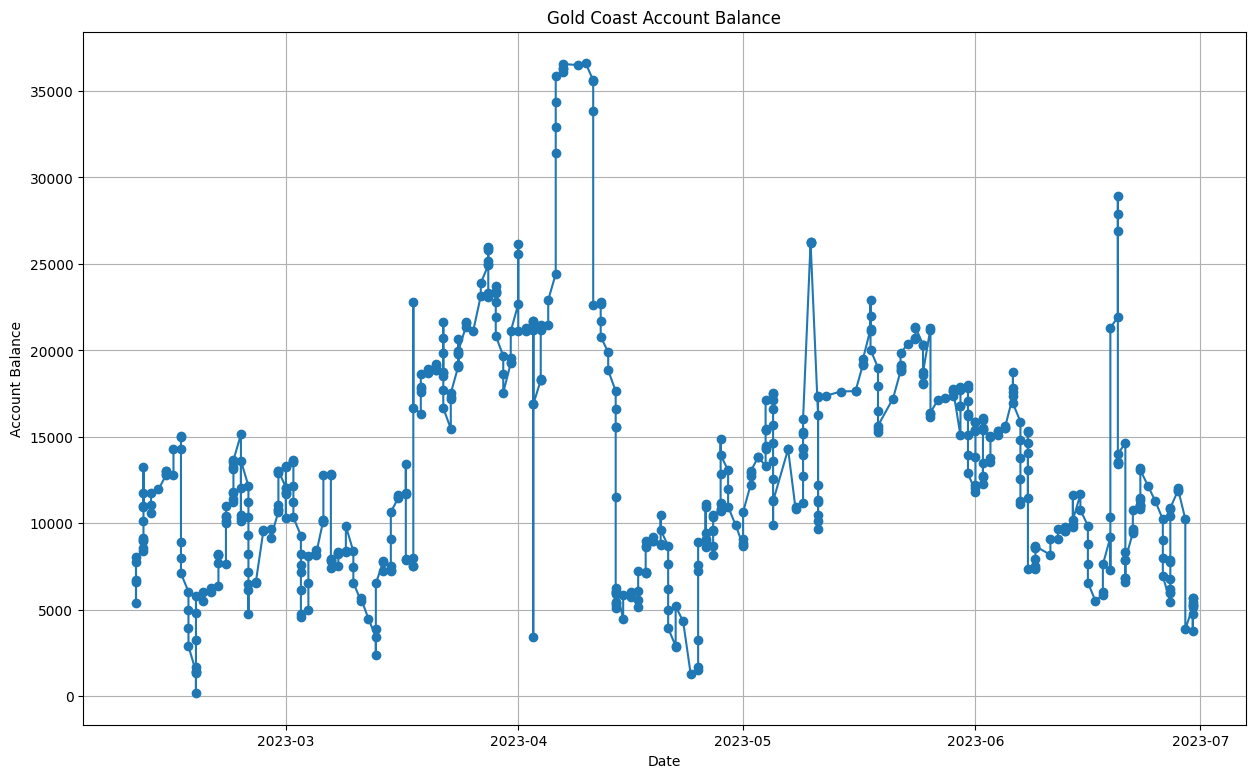

In [234]:
plt.figure(figsize=CFG.fig_size)
plt.plot(gc_df['Date'], gc_df['Account Balance'], marker='o', linestyle='-')
plt.title('Gold Coast Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()
# todo: add trend line